# The recurrent model
## Structure

The model looks like this:
![hackathon_model.png](images/recurrent_model.png)

**How do I run this experiment?**

```
# Make sure your PYTHONPATH is set correctly to the root

export PYTHONPATH=/path/to/project:$PYTHONPATH

python3 experiment.py --window TIME_WINDOW --epochs EPOCHS --batch BATCH_SIZE --band BAND
```

**How do I evaluate the model?**

```
python3 evaluation.py --window TIME_WINDOW --batch BATCH_SIZE
```


In [6]:
import pandas
import matplotlib.pyplot as plt
import os
from matplotlib import gridspec
import numpy as np

root = os.getcwd()
base_root = os.path.join(os.path.dirname(root), "baseline_model")


## Evaluation
The code below can be run if the baseline and recurrent experiment has been executed for 10, 5 and 2 seconds using the full frequency.


The evaluations for the base and recurrent experiment are read and a Wilcoxon test is performed to check the statistical significance of the results being greater.

In [7]:
from scipy import stats

with open(os.path.join(base_root, "output", "evaluation_128_full.json")) as fp:
    dfb1 = pandas.read_json(fp).T
with open(os.path.join(base_root, "output", "evaluation_320_full.json")) as fp:
    dfb2 = pandas.read_json(fp).T
with open(os.path.join(base_root, "output", "evaluation_640_full.json")) as fp:
    dfb3 = pandas.read_json(fp).T

with open(os.path.join(root, "output", "evaluation_128_full.json")) as fp:
    dfr1 = pandas.read_json(fp).T
with open(os.path.join(root, "output", "evaluation_320_full.json")) as fp:
    dfr2 = pandas.read_json(fp).T
with open(os.path.join(root, "output", "evaluation_640_full.json")) as fp:
    dfr3 = pandas.read_json(fp).T

print(stats.wilcoxon(dfr1.T.values[1], dfb1.T.values[1], alternative="greater"))
print(stats.wilcoxon(dfr2.T.values[1], dfb2.T.values[1], alternative="greater"))
print(stats.wilcoxon(dfr3.T.values[1], dfb3.T.values[1], alternative="greater"))

WilcoxonResult(statistic=1053.0, pvalue=9.243657984627427e-07)
WilcoxonResult(statistic=1111.0, pvalue=4.066044533018723e-08)
WilcoxonResult(statistic=1075.0, pvalue=3.195828614174954e-08)


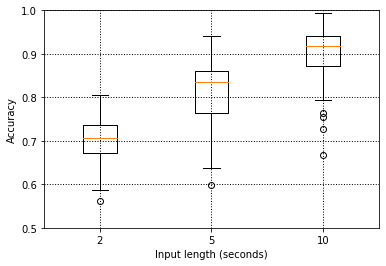

In [8]:
fig = plt.figure()
plt.grid(color='black', linestyle=':', linewidth=1)
plt.boxplot([dfr1[["acc"]].T.values[0], dfr2[["acc"]].T.values[0], dfr3[["acc"]].T.values[0]])
plt.ylim([0.5,1])
plt.ylabel("Accuracy")
plt.xlabel("Input length (seconds)")
plt.xticks([1, 2, 3], ["2", "5", "10"])
plt.show()
fig.savefig("plots/new_performance.svg", format="svg")

A boxplot is made to compare the results between the baseline and recurrent model

/home/ilias/Venv/thesis/lib/python3.7/site-packages/ipykernel_launcher.py:23: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


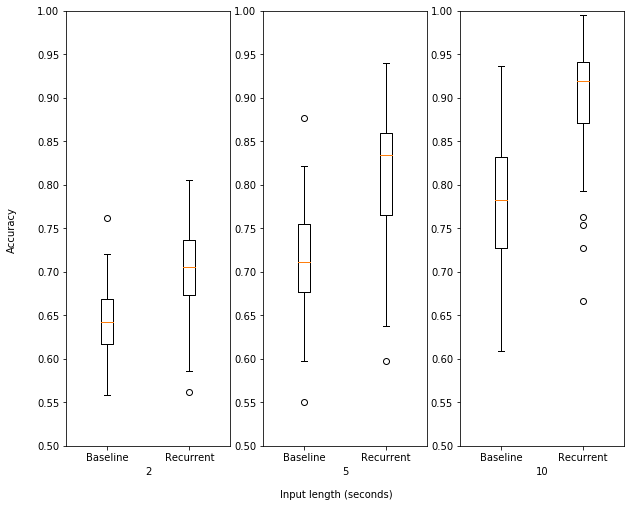

In [9]:
full_data = {
    '2': {'B': dfb1[["acc"]].T.values[0],
          'R': dfr1[["acc"]].T.values[0]},
    '5': {'B': dfb2[["acc"]].T.values[0],
          'R': dfr2[["acc"]].T.values[0]},
    '10': {'B': dfb3[["acc"]].T.values[0],
           'R': dfr3[["acc"]].T.values[0]}
}

fig = plt.figure(figsize=(10, 8))
fig.text(0.5, 0.04, "Input length (seconds)", ha="center", va="center")
fig.text(0.05, 0.5, "Accuracy", ha="center", va="center", rotation=90)
outer = gridspec.GridSpec(1, 3, wspace=0.2, hspace=0.2)
for i, name in zip([0, 1, 2], ['2', '5', '10']):
    ax = plt.Subplot(fig, outer[i])
    ax.boxplot([full_data[name][item] for item in ['B', 'R']])
    ax.set(xticklabels=['Baseline', 'Recurrent'], xlabel=name)
    ax.margins(0.05)
    ax.set_ylim([0.5, 1])
    ax.set_yticks(np.arange(0.5, 1.05, 0.05))
    fig.add_subplot(ax)
fig.show()
fig.savefig("plots/base_recurrent_comparison.svg", format="svg")

## Effect of frequency bands
Plot the boxplots of the accuracies of the different bands. This code can be running the evaluation for the 2 second model with the full frequency, delta band, theta band and delta+theta band.

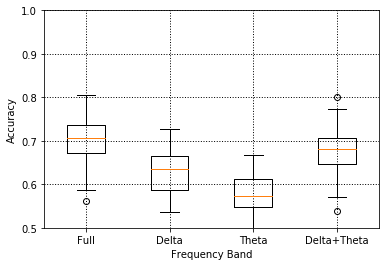

In [10]:
with open(os.path.join(root, "output", "evaluation_128_full.json")) as fp:
    df1 = pandas.read_json(fp).T
with open(os.path.join(root, "output", "evaluation_128_delta.json")) as fp:
    df2 = pandas.read_json(fp).T
with open(os.path.join(root, "output", "evaluation_128_theta.json")) as fp:
    df3 = pandas.read_json(fp).T
with open(os.path.join(root, "output", "evaluation_128_delta_theta.json")) as fp:
    df4 = pandas.read_json(fp).T

fig = plt.figure()
plt.grid(color='black', linestyle=':', linewidth=1)
plt.boxplot([df1[["acc"]].T.values[0], df2[["acc"]].T.values[0], df3[["acc"]].T.values[0], df4[["acc"]].T.values[0]])
plt.ylim([0.5,1])
plt.ylabel("Accuracy")
plt.xlabel("Frequency Band")
plt.xticks([1, 2, 3, 4], ["Full", "Delta", "Theta", "Delta+Theta"])
plt.show()
fig.savefig("plots/delta_theta_performance.svg", format="svg")